In [1]:
Netflix Data_Cleaning

SyntaxError: invalid syntax (2702714576.py, line 1)

In [ ]:
pip install wordcloud

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('netflix1.csv')
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [6]:
data.shape

(8790, 10)

In [2]:
Data Cleaning

SyntaxError: invalid syntax (365056939.py, line 1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [8]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [9]:
#Remove duplicates
data.drop_duplicates(inplace=True)

In [10]:
#Drop rows with missing important values (director, country):
data.dropna(subset=['director', 'country'], inplace=True)

In [11]:
#Convert date_added to datetime:
data['date_added'] = pd.to_datetime(data['date_added'])

In [12]:
#Check data types again:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

In [ ]:
EDA

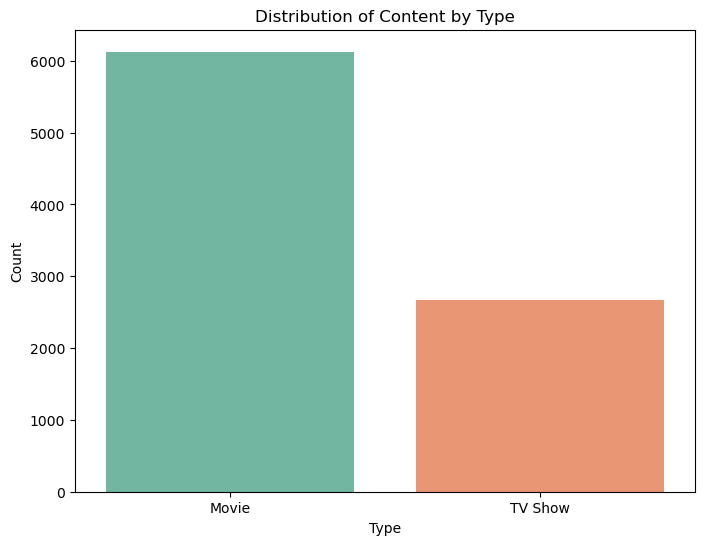

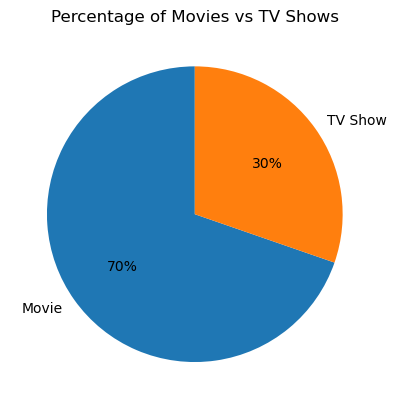

In [13]:
#Content Type Distribution (Movies vs TV Shows)
type_counts = data['type'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette="Set2")
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

plt.pie(type_counts, labels=type_counts.index, autopct='%.0f%%', startangle=90)
plt.title('Percentage of Movies vs TV Shows')
plt.show()

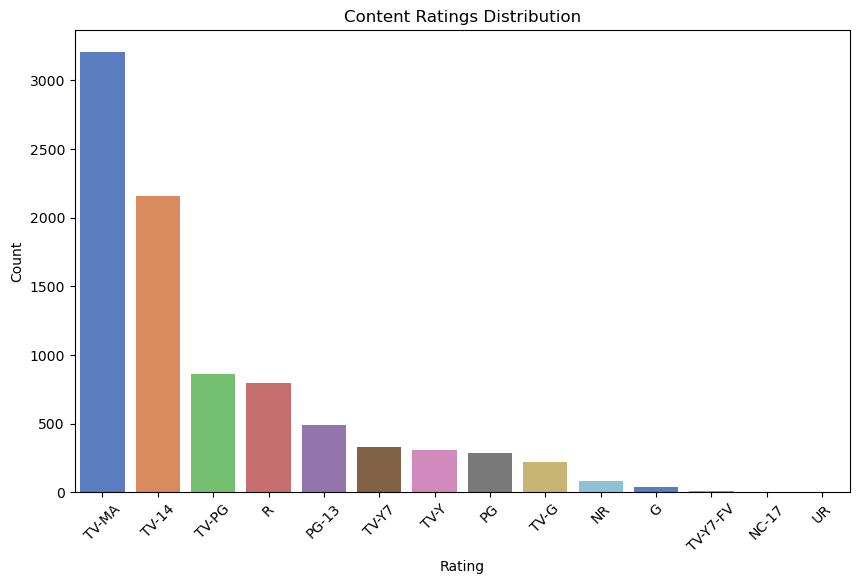

In [14]:
#Ratings Distribution
rating_counts = data['rating'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="muted")
plt.xticks(rotation=45)
plt.title('Content Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

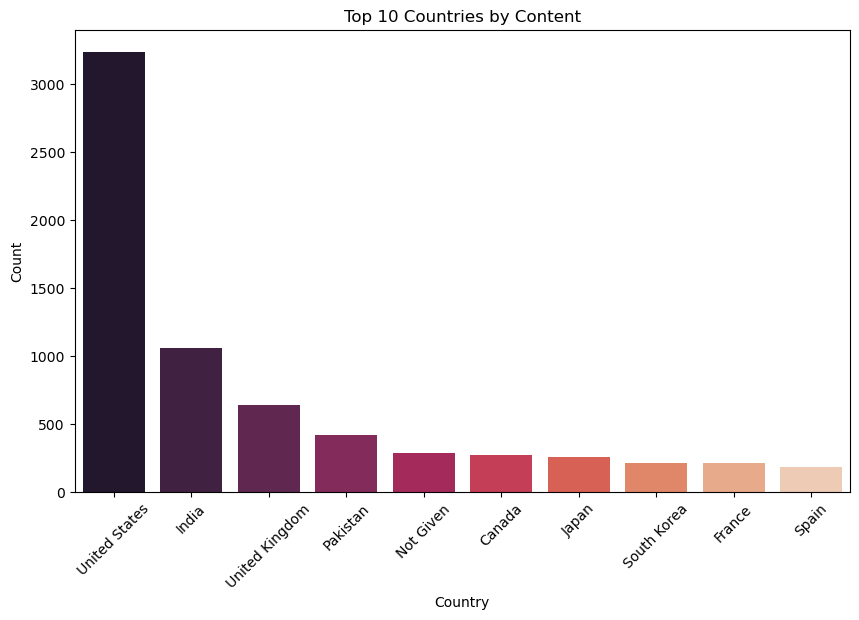

In [15]:
#Top 10 Countries by Number of Titles
top_countries = data['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="rocket")
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


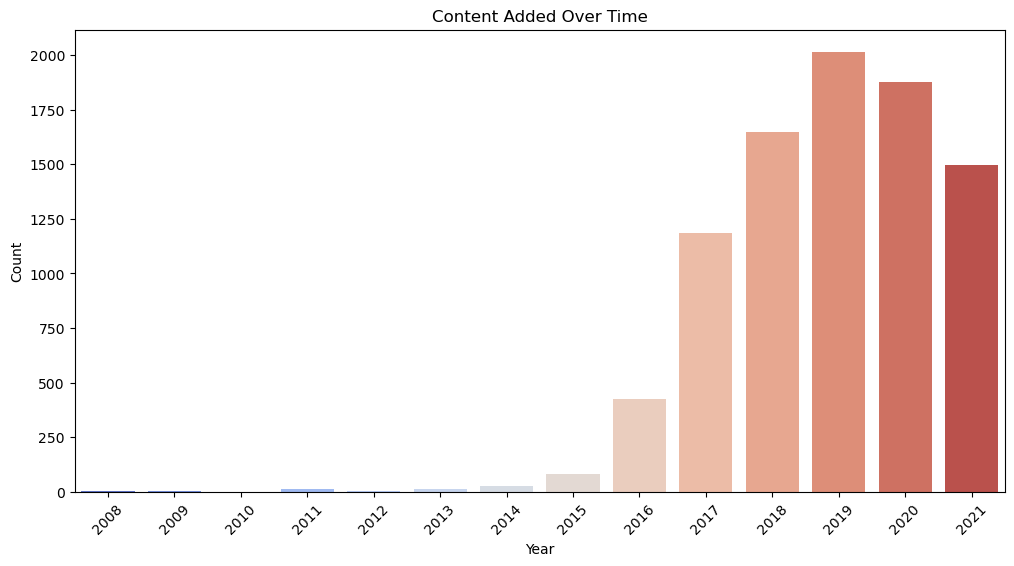

In [16]:
#Content Added Over Time
data['year_added'] = data['date_added'].dt.year

plt.figure(figsize=(12,6))
sns.countplot(x='year_added', data=data, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


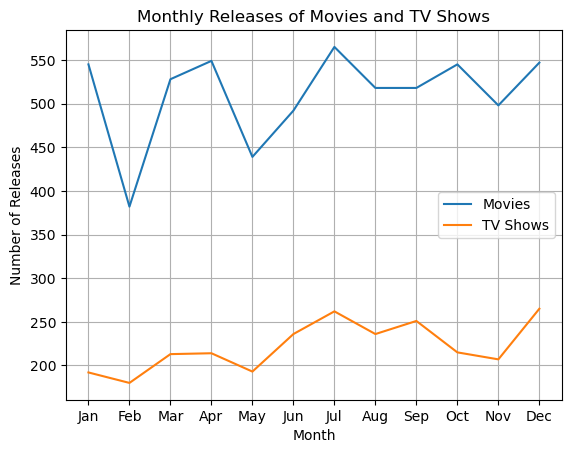

In [17]:
#Monthly Content Release Trend
data['month_added'] = data['date_added'].dt.month

monthly_movie = data[data['type']=='Movie']['month_added'].value_counts().sort_index()
monthly_tv = data[data['type']=='TV Show']['month_added'].value_counts().sort_index()

plt.plot(monthly_movie.index, monthly_movie.values, label='Movies')
plt.plot(monthly_tv.index, monthly_tv.values, label='TV Shows')

plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Monthly Releases of Movies and TV Shows')
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()
plt.grid()
plt.show()

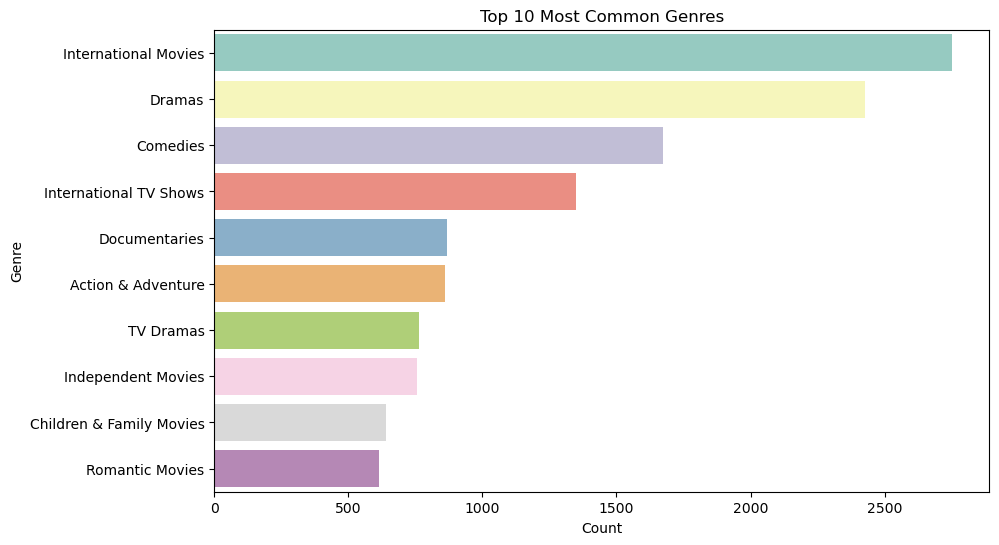

In [18]:
#Top 10 Most Common Genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))

all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

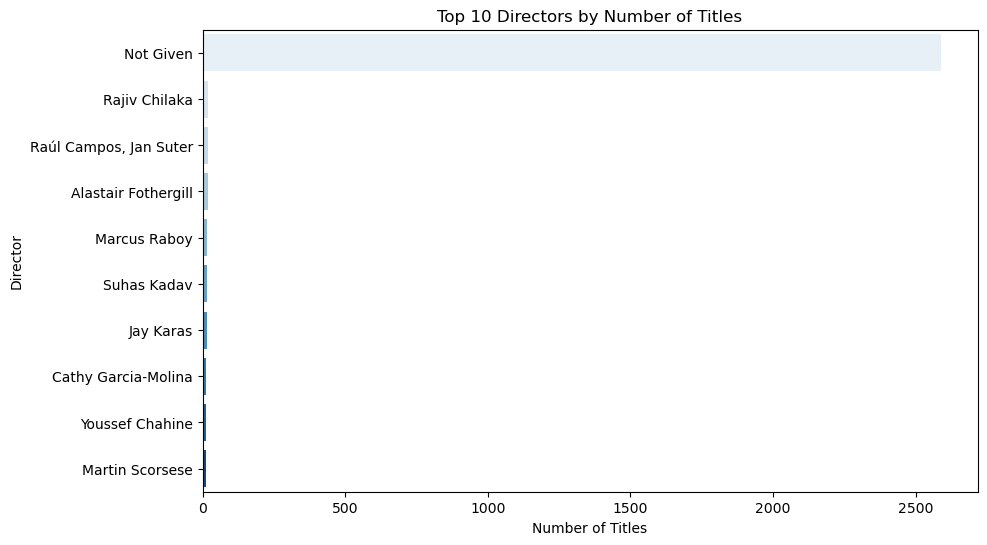

In [19]:
#Top 10 Directors with the Most Titles
top_directors = data['director'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues')
plt.title('Top 10 Directors by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

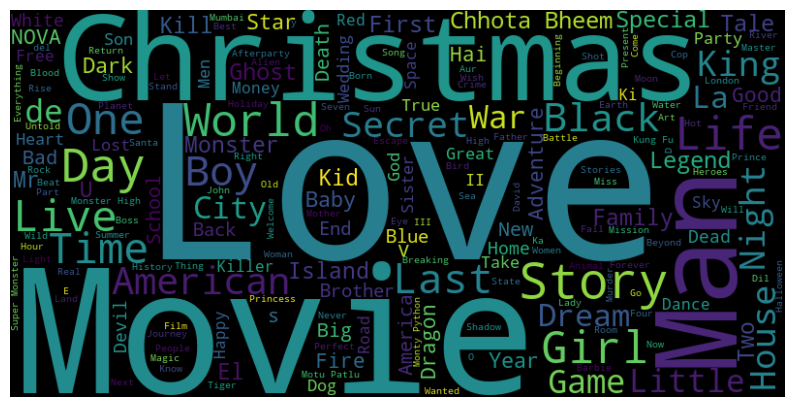

In [20]:
#Word Cloud of Movie Titles
from wordcloud import WordCloud
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
Conclusion & Insights
Observations:
1) Netflix has more Movies (70%) compared to TV Shows (30%).
2) United States, India, and UK are the top 3 countries producing the most content on Netflix.
3) Most common ratings are TV-MA, TV-14, and TV-PG.
4) Content addition peaked after 2018.
5) Popular genres include Dramas, International Movies, Documentaries, and Comedies.
6) Rajiv Chilaka and Alastair Fothergill are the top directors.

